In [118]:
import warnings
warnings.filterwarnings("ignore")
import torch
import networkx as nx
import os 
import sys
from evaluation.mol_structure import list_of_smiles_to_nx_graphs
#from evaluation.mol_structure import draw_one_mol, draw_graphs
#from evaluate import evaluate
#import utils.graph_generators as gen

current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)
import rdkit
import numpy as np
from evaluation.utils import get_data
import json
from evaluation.moses.metrics.utils  import logP, QED, SA
from rdkit import Chem
import pandas as pd
from rdkit import RDLogger 


In [68]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
def get_data(name, path='data/smiles/',return_smiles=False):
    splits={}
    RDLogger.EnableLog('rdApp.*')
    RDLogger.DisableLog('rdApp.*')  
    split_nbbb_martins=[ 'train1_pos_smiles','train1_neg_smiles','test_smiles','test_targets' ]
    for i,split in enumerate(split_names):
        exact_path=path+'{}/{}.txt'.format(name, split)
        #from data.smiles.carcinogens import test_smiles
        current_list = []
        with open(exact_path) as my_file:
         for line in my_file:
            current_list.append(line.strip())
        splits[split]=current_list     
    return splits
    

In [69]:
from rdkit import Chem
from rdkit.Chem import GetFormalCharge
from collections  import defaultdict
import rdkit
smiles='O[C@@](CCN1CCCC1)(c1ccccc1)C1CCCCC1'
m = Chem.MolFromSmiles(smiles)
def composition(molecule):
    """Get the composition of an RDKit molecule:
    Atomic counts, including hydrogen atoms, and any charge.
    For example, fluoride ion (chemical formula F-, SMILES string [F-])
    returns {9: 1, 0: -1}.

    :param molecule: The molecule to analyze
    :type some_input: An RDKit molecule
    :rtype: A dictionary.
    """
    all_unique_atoms=set()
    # Check that there is a valid molecule
    if molecule:
        atoms=[]
        n_atoms=0

        # Add hydrogen atoms--RDKit excludes them by default
        molecule_with_Hs = Chem.AddHs(molecule)
        comp = defaultdict(lambda: 0)
          # Get atom counts
        for atom in molecule.GetAtoms():
            n_atoms+=1
         

        # Get atom counts
        for atom in molecule_with_Hs.GetAtoms():
            comp[atom.GetAtomicNum()] += 1
            atoms.append(atom.GetAtomicNum())

        # If charged, add charge as "atomic number" 0
        charge = GetFormalCharge(molecule_with_Hs)
        if charge != 0:
            comp[0] = charge
        all_unique_atom=set(atoms)
        return comp,all_unique_atom,n_atoms
composition(m)


def get_unique_atoms(list_of_smiles):
    all_unique_atoms=set()
    max_n_atoms=0
    for smile in list_of_smiles:
        try:
            m=Chem.MolFromSmiles(smile)
            #print(composition(m))
            _,unique_atoms,n_atoms=composition(m)
            all_unique_atoms.update(unique_atoms)
            max_n_atoms=max(max_n_atoms,n_atoms)
        except: 
            print(smile)
            continue
    return all_unique_atoms,max_n_atoms


In [79]:
smniles='Cn1c(=O)nc2n(-c3ccc(N4CCOCC4)cc3)c3ccc([N+](=O)[O-])cc3cc-2c1=O'
m = Chem.MolFromSmiles(smiles)
composition(m)


(defaultdict(<function __main__.composition.<locals>.<lambda>()>,
             {8: 1, 6: 19, 7: 1, 1: 29}),
 {1, 6, 7, 8},
 21)

In [ ]:
ames_train1_pos=pd.read('data/smiles/ames/ames_train1_pos.txt')  
ames_train1_pos_smiles=list(ames_train1_pos['smiles'])
print(get_unique_atoms(ames_train1_pos_smiles))

In [73]:
get_unique_atoms([smiles])

({1, 6, 7, 8}, 21)

In [66]:
ames_train1_pos=pd.read_csv('data/smiles/ames/ames_train1_pos.csv')  
ames_train1_pos_smiles=list(ames_train1_pos['smiles'])
print(get_unique_atoms(ames_train1_pos_smiles))

ames_train1_neg=pd.read_csv('data/smiles/ames/ames_train1_neg.csv')  
ames_train1_neg_smiles=list(ames_train1_neg['smiles'])
print(get_unique_atoms(ames_train1_neg_smiles))


bbb_martins_train1_pos=pd.read_csv('data/smiles/bbb_martins/bbb_martins_train1_pos.csv')  
bbb_martins_train1_pos_smiles=list(bbb_martins_train1_pos['smiles'])
print(get_unique_atoms(bbb_martins_train1_pos_smiles))

bbb_martins_train1_neg=pd.read_csv('data/smiles/bbb_martins/bbb_martins_train1_neg.csv')  
bbb_martins_train1_neg_smiles=list(bbb_martins_train1_neg['smiles'])
print(get_unique_atoms(bbb_martins_train1_neg_smiles))


cyp1a2_veith_train1_pos=pd.read_csv('data/smiles/cyp1a2_veith/cyp1a2_veith_train1_pos.csv')  
cyp1a2_veith_train1_pos_smiles=list(cyp1a2_veith_train1_pos['smiles'])
print(get_unique_atoms(cyp1a2_veith_train1_pos_smiles))

cyp1a2_veith_train1_neg=pd.read_csv('data/smiles/cyp1a2_veith/cyp1a2_veith_train1_neg.csv')  
cyp1a2_veith_train1_neg_smiles=list(cyp1a2_veith_train1_neg['smiles'])
print(get_unique_atoms(cyp1a2_veith_train1_neg_smiles))

cyp2c19_veith_train1_pos=pd.read_csv('data/smiles/cyp2c19_veith/cyp2c19_veith_train1_pos.csv')  
cyp2c19_veith_train1_pos_smiles=list(cyp2c19_veith_train1_pos['smiles'])
print(get_unique_atoms(cyp2c19_veith_train1_pos_smiles))

cyp2c19_veith_train1_neg=pd.read_csv('data/smiles/cyp2c19_veith/cyp2c19_veith_train1_neg.csv')  
cyp2c19_veith_train1_neg_smiles=list(cyp2c19_veith_train1_neg['smiles'])
print(get_unique_atoms(cyp2c19_veith_train1_neg_smiles))


herg_karim_train1_pos=pd.read_csv('data/smiles/herg_karim/herg_karim_train1_pos.csv')  
herg_karim_train1_pos_smiles=list(herg_karim_train1_pos['smiles'])
print(get_unique_atoms(herg_karim_train1_pos_smiles))

herg_karim_train1_neg=pd.read_csv('data/smiles/herg_karim/herg_karim_train1_neg.csv')  
herg_karim_train1_neg_smiles=list(herg_karim_train1_neg['smiles'])
print(get_unique_atoms(herg_karim_train1_neg_smiles))

lipophilicity_astrazeneca_train1_pos=pd.read_csv('data/smiles/lipophilicity_astrazeneca/lipophilicity_astrazeneca_train1_pos.csv')  
lipophilicity_astrazeneca_train1_pos_smiles=list(lipophilicity_astrazeneca_train1_pos['smiles'])
print(get_unique_atoms(lipophilicity_astrazeneca_train1_pos_smiles))

lipophilicity_astrazeneca_train1_neg=pd.read_csv('data/smiles/lipophilicity_astrazeneca/lipophilicity_astrazeneca_train1_neg.csv')  
lipophilicity_astrazeneca_train1_neg_smiles=list(lipophilicity_astrazeneca_train1_neg['smiles'])
print(get_unique_atoms(lipophilicity_astrazeneca_train1_neg_smiles))


({1, 35, 6, 7, 8, 9, 15, 16, 17, 53}, 54)
({1, 35, 6, 7, 8, 9, 15, 16, 17, 53}, 52)
({1, 5, 6, 7, 8, 9, 11, 15, 16, 17, 35, 53}, 76)
({1, 35, 6, 7, 8, 9, 11, 15, 16, 17, 53}, 123)
({1, 6, 7, 8, 9, 11, 78, 15, 16, 17, 14, 80, 28, 29, 34, 35, 53}, 106)
({1, 3, 6, 7, 8, 9, 11, 14, 15, 16, 17, 80, 78, 20, 24, 25, 26, 29, 30, 33, 34, 35, 50, 51, 53}, 123)
({1, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 80, 19, 78, 29, 35, 53}, 106)
({1, 5, 6, 7, 8, 9, 11, 78, 15, 16, 17, 14, 19, 20, 25, 26, 29, 30, 33, 34, 35, 44, 50, 51, 53}, 101)
({1, 35, 6, 7, 8, 9, 14, 16, 17, 53}, 50)
({1, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 79, 34, 35, 53}, 58)
({1, 6, 7, 8, 9, 14, 15, 16, 17, 34, 35, 53}, 58)
({1, 35, 5, 6, 7, 8, 9, 15, 16, 17}, 115)


In [51]:

cyp1a2_veith_train1_pos=pd.read_csv('data/smiles/cyp1a2_veith/cyp1a2_veith_train1_pos.csv')  
cyp1a2_veith_train1_pos_smiles=list(cyp1a2_veith_train1_pos['smiles'])
print(get_unique_atoms(cyp1a2_veith_train1_pos_smiles))

cyp1a2_veith_train1_neg=pd.read_csv('data/smiles/cyp1a2_veith/cyp1a2_veith_train1_neg.csv')  
cyp1a2_veith_train1_neg_smiles=list(cyp1a2_veith_train1_neg['smiles'])
print(get_unique_atoms(cyp1a2_veith_train1_neg_smiles))

{1, 6, 7, 8, 9, 15, 16, 17, 35, 53}

In [26]:
smiles='C[C@@H]1O[C@H](O[C@@H]2CC[C@@]3(C=O)[C@H]4CC[C@@]5(C)[C@@H](C6=CC(=O)OC6)CC[C@@]5(O)[C@@H]4CC[C@]3(O)C2)C[C@H](O)[C@@H]1O'
smiles='C[SiH2][Cu]'
smiles='F'
smiles='CN[Cu](C)([Cu])([SeH])P[Mn].C[IH]N.C[Ni](N)O.N.NP.PI.P[Cu].P[Ni].[CaH][Pt].[Fe][Pt].[Fe][Se][Ni].[K][Pt].[Li]C.[Ni].[Pt]'
m = Chem.MolFromSmiles(smiles)


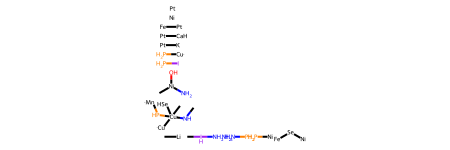

In [27]:
m

In [13]:
dir(Draw)

['BytesIO',
 'Chem',
 'ContourAndDrawGaussians',
 'ContourAndDrawGrid',
 'ContourParams',
 'DrawMoleculeACS1996',
 'DrawMorganBit',
 'DrawMorganBits',
 'DrawMorganEnv',
 'DrawMorganEnvs',
 'DrawRDKitBit',
 'DrawRDKitBits',
 'DrawRDKitEnv',
 'DrawRDKitEnvs',
 'DrawingOptions',
 'FingerprintEnv',
 'IPythonConsole',
 'IntStringMap',
 'InteractiveRenderer',
 'MeanBondLength',
 'MolDraw2D',
 'MolDraw2DCairo',
 'MolDraw2DSVG',
 'MolDrawOptions',
 'MolDrawing',
 'MolToACS1996SVG',
 'MolToFile',
 'MolToImage',
 'MolToImageFile',
 'MolToMPL',
 'MolToQPixmap',
 'MolToSVG',
 'MolsToGridImage',
 'MolsToImage',
 'PrepareAndDrawMolecule',
 'PrepareMolForDrawing',
 'RDConfig',
 'ReactionToImage',
 'SetACS1996Mode',
 'SetComicMode',
 'SetDarkMode',
 'SetMonochromeMode',
 'ShowMol',
 'UpdateDrawerParamsFromJSON',
 'UpdateMolDrawOptionsFromJSON',
 '_MolsToGridImage',
 '_MolsToGridSVG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__s

In [27]:
def get_data(name, path='data/smiles/',return_smiles=False):
    splits={}
    RDLogger.EnableLog('rdApp.*')
    RDLogger.DisableLog('rdApp.*')  
    split_names=[ 'train1_pos_smiles','train1_neg_smiles','test_smiles','test_targets' ]
    for i,split in enumerate(split_names):
        exact_path=path+'{}/{}.txt'.format(name, split)
        #from data.smiles.carcinogens import test_smiles
        current_list = []
        with open(exact_path) as my_file:
         for line in my_file:
            current_list.append(line.strip())
        splits[split]=current_list     
    return splits
    

In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
dataset_name='ames_50'
splits=get_data(dataset_name ,return_smiles=True)
splits

In [55]:
train1_pos_smiles,train1_neg_smiles, test_smiles, test_targets=splits['train1_pos_smiles'], splits['train1_neg_smiles'],splits['test_smiles'],splits['test_targets']
test_pos=[x for x, y in zip(splits['test_smiles'],splits['test_targets']) if y=='1']
test_neg=[x for x, y in zip(splits['test_smiles'],splits['test_targets']) if y=='0']
test_neg

['Cn1cnc2cc([N+](=O)[O-])ccc21',
 'CC[C@H](CO)NCCN[C@H](CC)CO',
 'CC(C)(C)NCC(O)c1cc(Cl)c(N)c(C(F)(F)F)c1',
 'OC[PH](CO)(CO)CO',
 'C/C=C/c1ccc(OC)cc1',
 'CC(C)=CCC1CCCC1=O',
 'CCCCCCCCCCCCOC(=O)CCSCCC(=O)OCCCCCCCCCCCC',
 'OCC(CO)N[C@@H]1C[C@](O)(CO)[C@H](O)[C@@H](O)[C@@H]1O',
 'O=[N+]([O-])c1ccc(COc2ccccc2)cc1',
 'O=C(C(=O)c1ccccc1)c1ccccc1',
 'Oc1c(Cl)cccc1Cl',
 'Cc1ccncc1',
 'O=C1NC(=O)[C@@H]2CC=CC[C@H]12',
 'CC(C)NCC(O)COc1cccc2[nH]c3ccccc3c12',
 'ClCc1cccc(CCl)c1',
 'CC1=CC[C@H]2C[C@@H]1C2(C)C',
 'CN(C)NC(=O)CCC(=O)O',
 'CC(=O)c1ccccc1',
 'CN(C)CCOC(c1ccccc1)c1ccccc1',
 'c1ccc(Nc2cccc3ccccc23)cc1',
 'C=C(C)C1CO1',
 'CC(=O)Nc1ccc2ccccc2n1',
 'CC1CCCC(O)CCCCCc2cc(O)cc(O)c2C(=O)O1',
 'CC(C)CNc1snc2ccccc12',
 'CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C',
 'NNc1ccc(C(=O)O)cc1',
 'Cc1ccc2ccc3ccccc3c2c1C',
 'OC(Cn1ccnc1)c1ccc(CCc2ccccc2)cc1',
 'O=C(O)c1ccccc1Nc1cc(Cl)ccc1C(=O)O',
 'CCOP(=S)(OCC(C)C)SCCl',
 'CNC1=C2CC(=O)C(OC)=CC=C2c2c(cc(OC)c(OC)c2OC)CC1',
 'O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc

In [119]:
for exp_no in range(1,9):
    pos=np.random.choice(train1_pos_smiles, 400, replace=False)
    neg=np.random.choice(train1_neg_smiles, 400, replace=False)
    pos_train1=pos[:150]
    pos_train2=pos[150:]
    neg_train1=neg[:150]
    neg_train2=neg[150:]
    with open(f"ames_50_exp/{exp_no}/train1_pos_smiles.txt", "w") as txt_file:
        for line in pos_train1:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/train1_neg_smiles.txt", "w") as txt_file:
        for line in neg_train1:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/test_pos_smiles.txt", "w") as txt_file:
        for line in test_pos:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/test_neg_smiles.txt", "w") as txt_file:
        for line in test_neg:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/train2_pos_smiles.txt", "w") as txt_file:
        for line in pos_train2:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/train2_neg_smiles.txt", "w") as txt_file:
        for line in neg_train2:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
            
    data=list(pos_train1)+test_pos
    mols =[Chem.MolFromSmiles(smiles)  for smiles in data]
    log_p =[logP(mol) for mol in mols]
    qeds= [QED(mol) for mol in mols]
    sas= [SA(mol) for mol in mols]
    d1={'smiles':data,'logP':log_p, 'qed':qeds,'SAS':sas}
    trial=pd.DataFrame(data=d1)
    trial.to_csv(f"ames_50_exp/{exp_no}/ames_50_{exp_no}_train1_pos.csv", index=True)

    data2=list(neg_train1)+test_neg
    mols =[Chem.MolFromSmiles(smiles)  for smiles in data2]
    log_p =[logP(mol) for mol in mols]
    qeds= [QED(mol) for mol in mols]
    sas= [SA(mol) for mol in mols]
    d2={'smiles':data2,'logP':log_p, 'qed':qeds,'SAS':sas}
    trial=pd.DataFrame(data=d2)
    trial.to_csv(f"ames_50_exp/{exp_no}/ames_50_{exp_no}_train1_neg.csv", index=True)

    valid_idx_pos=list(np.arange (len(pos_train1), len(pos_train1)+ len(test_pos)))
    valid_idx_pos_=[str(i) for i in valid_idx_pos]
    valid_idx_neg=list(np.arange (len(neg_train1), len(neg_train1)+ len(test_neg)))
    valid_idx_neg_=[str(i) for i in valid_idx_neg]


    dict={"valid_idxs":valid_idx_pos_}
    with open(f"ames_50_exp/{exp_no}/valid_idx_ames_50_{exp_no}_train1_pos.json".format(dataset_name), "w") as outfile:
        json.dump(dict, outfile)


    dict={"valid_idxs":valid_idx_neg_}
    with open(f"ames_50_exp/{exp_no}/valid_idx_ames_50_{exp_no}_train1_neg.json".format(dataset_name), "w") as outfile:
        json.dump(dict, outfile)

In [125]:

def kl_divergence_between_normals(mu1, std1, mu2, std2):
    '''
    Compute the Kullback–Leibler divergence between two univariate normal distributions.
    Note: if one of the std is 0 assume it has the same value as the other std
    if both std are 0 assume they both are equal to the smallest mean value
    if all values are 0 return 0
    '''
    if mu1 == mu2 == std1 == std2 == 0: return 0
    if std1 == std2 == 0: std1 = std2 = min(mu1,mu2)
    if std1 == 0: std1 = std2
    if std2 == 0: std2 = std1
    std1 += 1e-6
    std2 += 1e-6
    print(mu1, std1, mu2, std2)
    kl = np.log(std2/std1) + (std1**2 + (mu1-mu2)**2)/(2*std2**2) - 1/2
    return kl


In [126]:
((1+kl_divergence_between_normals(0.29, 0.1, 0, 0.1))**(-1) + (1+kl_divergence_between_normals(0, 0.1, 0.29, 0.1))**(-1))/2

0.29 0.100001 0 0.100001
0 0.100001 0.29 0.100001


0.1921260629317058

In [38]:

data=train1_pos_smiles+test_pos
mols =[Chem.MolFromSmiles(smiles)  for smiles in data]
log_p =[logP(mol) for mol in mols]
qeds= [QED(mol) for mol in mols]
sas= [SA(mol) for mol in mols]
d1={'smiles':data,'logP':log_p, 'qed':qeds,'SAS':sas}
trial=pd.DataFrame(data=d1)
trial.to_csv('ames_50_exp/{}_train1_pos.csv'.format(dataset_name), index=True)

In [97]:
data2=train1_neg_smiles+test_neg
mols =[Chem.MolFromSmiles(smiles)  for smiles in data2]
log_p =[logP(mol) for mol in mols]
qeds= [QED(mol) for mol in mols]
sas= [SA(mol) for mol in mols]
d2={'smiles':data2,'logP':log_p, 'qed':qeds,'SAS':sas}
trial=pd.DataFrame(data=d2)
trial.to_csv('ames_50_exp/{}_train1_neg.csv'.format(dataset_name), index=True)

In [98]:
valid_idx_pos=list(np.arange (len(train1_pos_smiles), len(train1_pos_smiles)+ len(test_pos)))
valid_idx_pos_=[str(i) for i in valid_idx_pos]
valid_idx_neg=list(np.arange (len(train1_neg_smiles), len(train1_neg_smiles)+ len(test_neg)))
valid_idx_neg_=[str(i) for i in valid_idx_neg]

In [99]:
dict={"valid_idxs":valid_idx_pos_}
with open("valid_idx_{}_train1_pos.json".format(dataset_name), "w") as outfile:
    json.dump(dict, outfile)


In [100]:
dict={"valid_idxs":valid_idx_neg_}
with open("valid_idx_{}_train1_neg.json".format(dataset_name), "w") as outfile:
    json.dump(dict, outfile)


In [ ]:
for exp_no in range(1,9):
    pos=np.random.choice(train1_pos_smiles, 400, replace=False)
    neg=np.random.choice(train1_neg_smiles, 400, replace=False)
    pos_train1=pos[:150]
    pos_train2=pos[150:]
    neg_train1=neg[:150]
    neg_train2=neg[150:]
    
    
    with open(f"ames_50_exp/{exp_no}/train1_pos_smiles.txt", "w") as txt_file:
        for line in pos_train1:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/train1_neg_smiles.txt", "w") as txt_file:
        for line in neg_train1:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/test_pos_smiles.txt", "w") as txt_file:
        for line in test_pos:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/test_neg_smiles.txt", "w") as txt_file:
        for line in test_neg:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/train2_pos_smiles.txt", "w") as txt_file:
        for line in pos_train2:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
    with open(f"ames_50_exp/{exp_no}/train2_neg_smiles.txt", "w") as txt_file:
        for line in neg_train2:
            txt_file.write("".join(line) + "\n") # works with any number of elements in a line
            
    data=list(pos_train1)+test_pos
    mols =[Chem.MolFromSmiles(smiles)  for smiles in data]
    log_p =[logP(mol) for mol in mols]
    qeds= [QED(mol) for mol in mols]
    sas= [SA(mol) for mol in mols]
    d1={'smiles':data,'logP':log_p, 'qed':qeds,'SAS':sas}
    trial=pd.DataFrame(data=d1)
    trial.to_csv(f"ames_50_exp/{exp_no}/ames_50_{exp_no}_train1_pos.csv", index=True)

    data2=list(neg_train1)+test_neg
    mols =[Chem.MolFromSmiles(smiles)  for smiles in data2]
    log_p =[logP(mol) for mol in mols]
    qeds= [QED(mol) for mol in mols]
    sas= [SA(mol) for mol in mols]
    d2={'smiles':data2,'logP':log_p, 'qed':qeds,'SAS':sas}
    trial=pd.DataFrame(data=d2)
    trial.to_csv(f"ames_50_exp/{exp_no}/ames_50_{exp_no}_train1_neg.csv", index=True)

    valid_idx_pos=list(np.arange (len(pos_train1), len(pos_train1)+ len(test_pos)))
    valid_idx_pos_=[str(i) for i in valid_idx_pos]
    valid_idx_neg=list(np.arange (len(neg_train1), len(neg_train1)+ len(test_neg)))
    valid_idx_neg_=[str(i) for i in valid_idx_neg]


    dict={"valid_idxs":valid_idx_pos_}
    with open(f"ames_50_exp/{exp_no}/valid_idx_ames_50_{exp_no}_train1_pos.json".format(dataset_name), "w") as outfile:
        json.dump(dict, outfile)


    dict={"valid_idxs":valid_idx_neg_}
    with open(f"ames_50_exp/{exp_no}/valid_idx_ames_50_{exp_no}_train1_neg.json".format(dataset_name), "w") as outfile:
        json.dump(dict, outfile)

In [ ]:
train1_pos_smiles,train1_neg_smiles, test_smiles, test_targets=splits['train1_pos_smiles'], splits['train1_neg_smiles'],splits['test_smiles'],splits['test_targets']
test_pos=[x for x, y in zip(splits['test_smiles'],splits['test_targets']) if y=='1']
test_neg=[x for x, y in zip(splits['test_smiles'],splits['test_targets']) if y=='0']
test_neg

In [83]:
from evaluation.mol_structure import list_of_smiles_to_nx_graphs

In [117]:
from eden.ml.ml import serial_vectorize as vectorize
from eden.graph import Vectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score,balanced_accuracy_score

for exp_no in range(1,9):
        pos=np.random.choice(train1_pos_smiles, 400, replace=False)
        neg=np.random.choice(train1_neg_smiles, 400, replace=False)
        pos_train1=pos[:150]
        pos_train2=pos[150:]
        neg_train1=neg[:150]
        neg_train2=neg[150:]
        train1_graphs =list_of_smiles_to_nx_graphs(pos_train1) + list_of_smiles_to_nx_graphs(neg_train1)
        train1_targets=[1]*len(pos_train1)+ [0]*len(neg_train1)
        train2_graphs =list_of_smiles_to_nx_graphs(pos_train2) + list_of_smiles_to_nx_graphs(neg_train2)
        train2_targets=[1]*len(pos_train2)+ [0]*len(neg_train2)
        test_graphs=list_of_smiles_to_nx_graphs(test_pos) + list_of_smiles_to_nx_graphs(test_neg)
        test_targets  =[1]*len(test_pos)+ [0]*len(test_neg)


        estimator =ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=0)
   
        train_graphs, train_targets=train1_graphs +  train2_graphs , train1_targets+train2_targets
        
        vectorizer = Vectorizer(
                r=2, d=4,
                normalization=False,
                inner_normalization=False,
                discrete=True,
                nbits=16)

        def serialize(train_graphs,test_graphs,train1_graphs,train2_graphs):
                X_train=vectorize(train_graphs,vectorizer=vectorizer).toarray()
                X_test=vectorize(test_graphs,vectorizer=vectorizer).toarray()
                X_train1=vectorize(train1_graphs,vectorizer=vectorizer).toarray()
                X_train2=vectorize(train2_graphs,vectorizer=vectorizer).toarray()
                return X_train,X_test,X_train1,X_train2
        X_train,X_test,X_train1,X_train2=serialize(train_graphs,test_graphs,train1_graphs,train2_graphs)

        def predict(test_embedding):
                preds= estimator.predict(test_embedding)
                return preds
        def compute_auc(X_train, train_targets,X_test, test_targets):
                estimator.fit( X_train,train_targets)
                preds=predict(X_test )
                #print(preds)
                auc=balanced_accuracy_score(test_targets, preds)
                return auc

        auc_1= compute_auc(X_train1, train1_targets, X_test, test_targets)
        auc_2=compute_auc(X_train, train_targets, X_test, test_targets)
        auc_3=compute_auc(X_train2, train2_targets, X_test, test_targets)
        print(auc_1, auc_3,auc_2 )


0.7144990134911747 0.7405481789580334 0.7611315522849678
0.710206366981283 0.7336159547805685 0.7549192129259319
0.7113795126113156 0.7334159867754493 0.7649576067829147
0.7055004532608116 0.7258705273822855 0.7478403455447129
0.7082066869300911 0.7215378872713699 0.7448141630672426
0.7143257078867381 0.7427211646136618 0.7549458753266144
0.7125259958406654 0.7129126006505626 0.7536260864928279
0.7195915320215431 0.7102196981816242 0.7421612541993281
